In [398]:
import warnings
warnings.filterwarnings('ignore')

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [400]:

#Loading the dataset
df0=pd.read_csv('housing_data_set_ml_proj1.csv')
df0.head()

id  longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   1    -122.23     37.88                  41        880.0           129.0   
1   2    -122.22     37.86                  21       7099.0          1106.0   
2   3    -122.24     37.85                  52       1467.0           190.0   
3   4    -122.25     37.85                  52       1274.0           235.0   
4   5    -122.25     37.85                  52       1627.0           280.0   

   population households  median_income  median_house_value ocean_proximity  \
0         322        126         8.6252              452900        NEAR BAY   
1        2401       1138         8.6014              358800        NEAR BAY   
2         496        177         7.5574              352400        NEAR BAY   
3         558        219         5.9431              341600        NEAR BAY   
4         565        259         4.1462              342500        NEAR BAY   

   Unnamed: 11  Unnamed: 12  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN

In [401]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20640 non-null  int64  
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  int64  
 4   total_rooms         20637 non-null  float64
 5   total_bedrooms      20433 non-null  float64
 6   population          20640 non-null  int64  
 7   households          20640 non-null  object 
 8   median_income       20636 non-null  float64
 9   median_house_value  20640 non-null  int64  
 10  ocean_proximity     20630 non-null  object 
 11  Unnamed: 11         0 non-null      float64
 12  Unnamed: 12         0 non-null      float64
dtypes: float64(7), int64(4), object(2)
memory usage: 2.0+ MB


In [402]:
df0.describe(include="all").T

count unique        top  freq           mean  \
id                  20640.0    NaN        NaN   NaN        10320.5   
longitude           20640.0    NaN        NaN   NaN    -119.569704   
latitude            20640.0    NaN        NaN   NaN      35.631861   
housing_median_age  20640.0    NaN        NaN   NaN      28.639486   
total_rooms         20637.0    NaN        NaN   NaN    2634.865969   
total_bedrooms      20433.0    NaN        NaN   NaN     537.870553   
population          20640.0    NaN        NaN   NaN    1425.476744   
households            20640   1817        306    57            NaN   
median_income       20636.0    NaN        NaN   NaN       4.170875   
median_house_value  20640.0    NaN        NaN   NaN  207155.816909   
ocean_proximity       20630      5  <1H OCEAN  9136            NaN   
Unnamed: 11             0.0    NaN        NaN   NaN            NaN   
Unnamed: 12             0.0    NaN        NaN   NaN            NaN   

                              std      min       25%       50%       75%  \
id                    5958.399114      1.0   5160.75   10320.5  15480.25   
longitude                2.003532  -124.35    -121.8   -118.49   -118.01   
latitude                 2.135952    32.54     33.93     34.26     37.71   
housing_median_age      12.585558      1.0      18.0      29.0      37.0   
total_rooms           2180.350225      2.0    1447.0    2127.0    3146.0   
total_bedrooms          421.38507      1.0     296.0     435.0     647.0   
population            1132.462122      3.0     787.0    1166.0    1725.0   
households                    NaN      NaN       NaN       NaN       NaN   
median_income            1.899942   0.7999    2.8634    3.8351    5.0437   
median_house_value  115395.615874  15299.0  119900.0  180000.0  265025.0   
ocean_proximity               NaN      NaN       NaN       NaN       NaN   
Unnamed: 11                   NaN      NaN       NaN       NaN       NaN   
Unnamed: 12                   NaN      NaN       NaN       NaN       NaN   

                         max  
id                   20640.0  
longitude            -114.31  
latitude               41.95  
housing_median_age      52.0  
total_rooms          39320.0  
total_bedrooms        6445.0  
population           35682.0  
households               NaN  
median_income        15.3001  
median_house_value  500301.0  
ocean_proximity          NaN  
Unnamed: 11              NaN  
Unnamed: 12              NaN

# 1. Data health Checkup

### 1.1 Completeness Checkup

**1.1.1 Data coverage**

In [403]:
num_rows = df0.shape[0]
print(num_rows)

20640


In [404]:
print(f'Number of records: {df0.shape[0]} and number of variables: {df0.shape[1]}')  # shape, filled values in each column, datatypes, memory that data will occupy in machine

Number of records: 20640 and number of variables: 13


In [405]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20640 non-null  int64  
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  int64  
 4   total_rooms         20637 non-null  float64
 5   total_bedrooms      20433 non-null  float64
 6   population          20640 non-null  int64  
 7   households          20640 non-null  object 
 8   median_income       20636 non-null  float64
 9   median_house_value  20640 non-null  int64  
 10  ocean_proximity     20630 non-null  object 
 11  Unnamed: 11         0 non-null      float64
 12  Unnamed: 12         0 non-null      float64
dtypes: float64(7), int64(4), object(2)
memory usage: 2.0+ MB


**1.1.2 Finding Missing values**

In [406]:
missing_values = df0.isnull().sum()
print(missing_values)

id                        0
longitude                 0
latitude                  0
housing_median_age        0
total_rooms               3
total_bedrooms          207
population                0
households                0
median_income             4
median_house_value        0
ocean_proximity          10
Unnamed: 11           20640
Unnamed: 12           20640
dtype: int64


In [407]:
# proportion of missing values
( missing_values * 100 )/ df0.shape[0] # Broadcasting

id                      0.000000
longitude               0.000000
latitude                0.000000
housing_median_age      0.000000
total_rooms             0.014535
total_bedrooms          1.002907
population              0.000000
households              0.000000
median_income           0.019380
median_house_value      0.000000
ocean_proximity         0.048450
Unnamed: 11           100.000000
Unnamed: 12           100.000000
dtype: float64

**1.1.3. Feature completeness**


---

### 1.2 Accuracy checks

**1.2.1 Duplicates**

In [408]:
df0.duplicated().sum() # Will define duplicated records

0

In [409]:
duplicate_rows = df0[df0.duplicated()]
print("Duplicate Rows:")
print(len(duplicate_rows))

Duplicate Rows:
0


**1.2.2 (a) Outliers using IQR**

In [410]:
#Since the household column is "object" type, it will have to be coverted to categorical before we find the outliers

In [411]:
#searching the date string values from the "household" column

df0[df0["households"].str.match('^\d{2}-\d{2}-\d{4}$')]

id  longitude  latitude  housing_median_age  total_rooms  \
126      127    -122.22     37.84                  50       2935.0   
20403  20404    -118.88     34.22                  22       3654.0   
20409  20410    -118.86     34.20                  32       2399.0   

       total_bedrooms  population  households  median_income  \
126             473.0        1031  23-05-2011         7.8000   
20403           517.0        1565  21-05-2011         6.5748   
20409           384.0        1199  23-05-2011         4.4250   

       median_house_value ocean_proximity  Unnamed: 11  Unnamed: 12  
126                295500        NEAR BAY          NaN          NaN  
20403              275100       <1H OCEAN          NaN          NaN  
20409              264900       <1H OCEAN          NaN          NaN

In [412]:
df0_household_daterror_0 = df0[df0["households"].str.match('^\d{2}-\d{2}-\d{4}$')]

In [413]:
df0_household_daterror_0.index

Index([126, 20403, 20409], dtype='int64')

In [414]:
df0 = df0.drop([126, 20403, 20409])

In [415]:
#changing the type of the "household" column

df0["households"] = df0["households"].astype("int64")

In [416]:
def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [417]:
column_names = ['longitude','latitude','housing_median_age',"total_rooms","total_bedrooms","population","households", "median_income","median_house_value"]

for column_name in column_names:
    outliers = find_outliers_iqr(df0[column_name])
    print(f"The number of outliers of {column_name} are",len(outliers))

The number of outliers of longitude are 0
The number of outliers of latitude are 0
The number of outliers of housing_median_age are 0
The number of outliers of total_rooms are 1284
The number of outliers of total_bedrooms are 1271
The number of outliers of population are 1196
The number of outliers of households are 1220
The number of outliers of median_income are 680
The number of outliers of median_house_value are 1071


**1.2.2 (b) Outliers using Zscore**

In [418]:
#Outliers using Zscore

def find_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = data[z_scores > threshold]
    return outliers

In [419]:
column_names = ['longitude','latitude','housing_median_age',"total_rooms","total_bedrooms","population","households","median_income","median_house_value"]


for column_name in column_names:
    outliers = find_outliers_zscore(df0[column_name])
    print(f"The number of outliers of {column_name} are",len(outliers))

The number of outliers of longitude are 0
The number of outliers of latitude are 0
The number of outliers of housing_median_age are 0
The number of outliers of total_rooms are 372
The number of outliers of total_bedrooms are 368
The number of outliers of population are 342
The number of outliers of households are 363
The number of outliers of median_income are 345
The number of outliers of median_house_value are 0


**1.2.2 (c) Viewing outliers using ScatterPlot**

In [420]:
import matplotlib.pyplot as plt

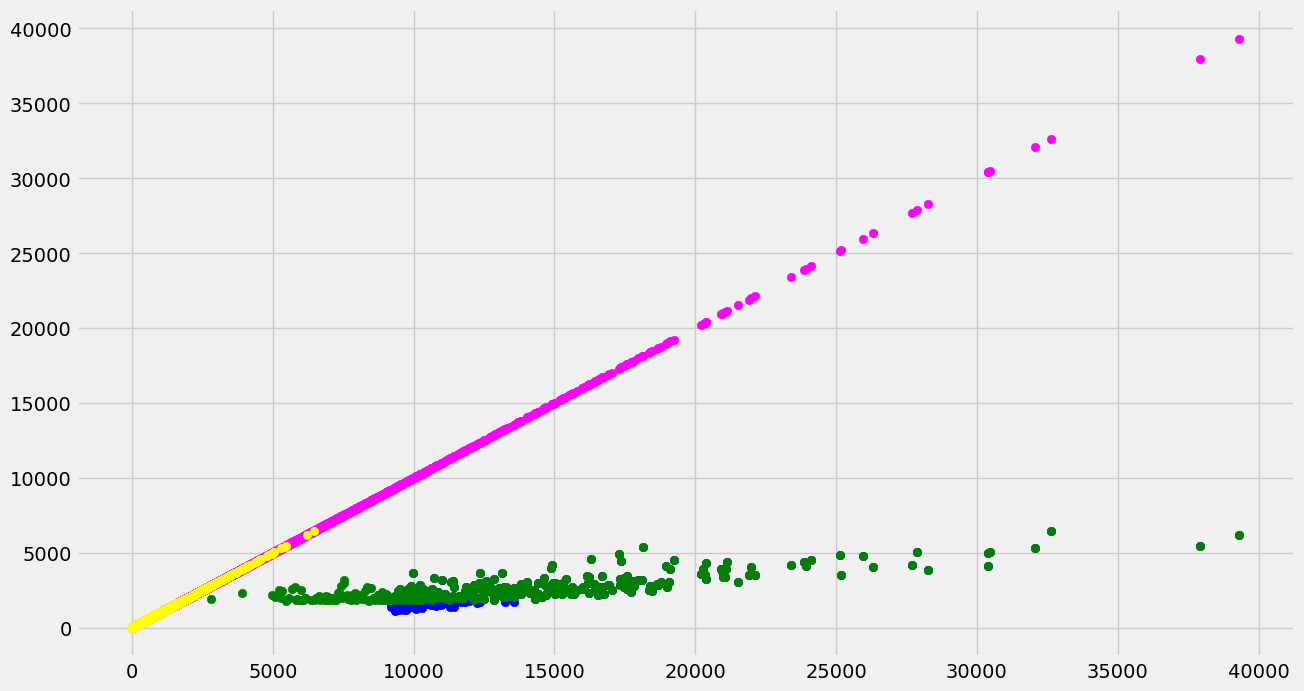

In [421]:

def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

outliers_total_rooms = detect_outliers_zscore(df0["total_rooms"])
outliers_total_bedrooms = detect_outliers_zscore(df0["total_bedrooms"])

plt.figure(figsize=(14, 8))

plt.scatter(df0["total_rooms"],df0["total_rooms"],c="magenta")
plt.scatter(df0["total_bedrooms"],df0["total_bedrooms"],c="yellow")
plt.scatter(df0["total_rooms"][outliers_total_rooms],df0["total_bedrooms"][outliers_total_rooms],c="blue")
plt.scatter(df0["total_rooms"][outliers_total_bedrooms],df0["total_bedrooms"][outliers_total_bedrooms],c="green")

# Set labels and legend
# plt.xlabel('total_rooms')
# plt.ylabel('total_bedrooms')
# plt.legend(loc='upper right')


In [422]:

# Function to detect outliers based on Z-score method
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# Detect outliers in both features
outliers_feature1 = detect_outliers_zscore(df['mileage'])
outliers_feature2 = detect_outliers_zscore(df['tax'])



# Create a scatter plot
plt.scatter(df['mileage'], df['mileage'], c='blue', label='Data Points')
plt.scatter(df['mileage'][outliers_feature1], df['tax'][outliers_feature1], c='red', label='Outliers (mileage)')
plt.scatter(df['mileage'][outliers_feature2], df['tax'][outliers_feature2], c='green', label='Outliers (tax)')

# Set labels and legend

plt.xlabel('mileage')
plt.ylabel('tax')
plt.legend(loc='upper right')

NameError: name 'df' is not defined

In both methods, the threshold parameter determines the sensitivity of outlier detection. A higher threshold value will capture more outliers, while a lower value will be more conservative.

----
----

# 2. Data Preprocessing

### 2.1 Data consistency

**2.1.0 Dropping the unnecessary columns**

In [423]:
#dropping not required columns

df0 = df0.drop(columns=["Unnamed: 11", "Unnamed: 12"])

In [424]:
#checking the df again to confirm the deletion of unnecessary columns

df0.head(1)

id  longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   1    -122.23     37.88                  41        880.0           129.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.6252              452900        NEAR BAY

---

**2.1.1(a) Convert columns which looks numerical but are categorical.**

**2.1.1(b) Converting any other (expected to be) columns to categorical**

**Motive** - to perform data analysis on these columns separately then numerical columns


#str <- float <- int <- bool  : The above operation is seamless in nature

#str -> float -> int -> bool : The above operation is possible when str is non standard numeric

In [425]:
# function to convert column's datatype to "category"

def convert_to_categorical_0(df, column_name):
    df[column_name] = df[column_name].astype('category')
    return df

In [426]:
# Writing a new function to handle multiple column name changes in one go:

def convert_to_categorical_1(df, column_names):
    for name in column_names:
        df[name] = df[name].astype("category")
    return df

In [427]:
# Calling the convert_to_categorical_1 function to convert the mutiple columns 

# column_name_to_convert = ['column name']

# df0 = convert_to_categorical_1(df0, column_name_to_convert)


<span style="color: red"> ☝️☝️NOTE: No category change needed. ☝️☝️ </span>

In [428]:
# Confirming the category columns in the dataframe:

# df0.describe(include="category")

----

### 2.2 Missing Values

**2.2.1 Fill missing values with mean for each numerical column**

In [429]:
numerical_columns = df0.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    mean_value = df0[column].mean()
    df0[column].fillna(mean_value, inplace=True)

In [430]:
# verifying  missing values after:
missing_values = df0.isnull().sum()
print(missing_values)

id                     0
longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity       10
dtype: int64


**2.2.2 Fill missing values with mode for each categorical column**

In [431]:
categorical_columns = df0.select_dtypes(include=['object','category']).columns

for column in categorical_columns:
    if df0[column].isnull().any():
        # Replace missing values with the mean of the column
        df0[column].fillna(df0[column].mode()[0], inplace=True)

In [432]:
#check if null values are thprint(f'Number of records: {df.shape[0]} and number of variables: {df.shape[1]}')ere anymore
df0.isnull().sum()

id                    0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

###  2.3 Remove duplicates from the entire DataFrame

In [433]:
# df.drop_duplicates(inplace=True) # The inplace argument will perform the operation in the memory
# df.info()

df.reset_index(drop=True, inplace=True)
df.info()

In [434]:
# df.describe(include='all')

### 2.3 Removing Outliers

In [435]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20637 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20637 non-null  int64  
 1   longitude           20637 non-null  float64
 2   latitude            20637 non-null  float64
 3   housing_median_age  20637 non-null  int64  
 4   total_rooms         20637 non-null  float64
 5   total_bedrooms      20637 non-null  float64
 6   population          20637 non-null  int64  
 7   households          20637 non-null  int64  
 8   median_income       20637 non-null  float64
 9   median_house_value  20637 non-null  int64  
 10  ocean_proximity     20637 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 1.9+ MB


In [436]:
#finding outliers using the iqr method:

column_names = df0.select_dtypes(include=['int64', 'float64']).columns


for column_name in column_names:
    outliers = find_outliers_iqr(df0[column_name])
    print(f"The number of outliers of {column_name} are",len(outliers))

The number of outliers of id are 0
The number of outliers of longitude are 0
The number of outliers of latitude are 0
The number of outliers of housing_median_age are 0
The number of outliers of total_rooms are 1284
The number of outliers of total_bedrooms are 1299
The number of outliers of population are 1196
The number of outliers of households are 1220
The number of outliers of median_income are 682
The number of outliers of median_house_value are 1071


In [437]:
# Another IQR method to use - Returns IQR is True or False against the column name:

#function to find the upper and lower fence of the box plot:

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_fence = quartile3 + 1.5 * interquantile_range
    low_fence = quartile1 - 1.5 * interquantile_range
    return up_fence, low_fence


#function to find the upper and lower fence of the box plot:

def check_outlier(dataframe, col_name):
    up_fence, low_fence = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_fence) | (dataframe[col_name] < low_fence)].any(axis=None): 
        #.any() return "True" if there is atleast one "True" in the iterable, and "False" if all the elements are "False".
        return True
    else:
        return False

In [438]:
#checking the columns with the outliers

column_names = df0.select_dtypes(include=['int64', 'float64']).columns

for col in column_names:
    print(col,"=",check_outlier(df0, col))

id = False
longitude = False
latitude = False
housing_median_age = False
total_rooms = True
total_bedrooms = True
population = True
households = True
median_income = True
median_house_value = True


In [439]:
#finding outliers using the z score method:


column_names = df0.select_dtypes(include=['int64', 'float64']).columns

for column_name in column_names:
    outliers = find_outliers_zscore(df0[column_name])
    print(f"The number of outliers of {column_name} are",len(outliers))

The number of outliers of id are 0
The number of outliers of longitude are 0
The number of outliers of latitude are 0
The number of outliers of housing_median_age are 0
The number of outliers of total_rooms are 373
The number of outliers of total_bedrooms are 375
The number of outliers of population are 342
The number of outliers of households are 363
The number of outliers of median_income are 345
The number of outliers of median_house_value are 0


In [441]:
#double checking the outlier using the histplot for "total_rooms":

import plotly.express as px

px.box(data_frame=df0, x="total_rooms")

In [442]:
#double checking the outlier using the histplot for "total_bedrooms":

px.box(data_frame=df0, x="total_bedrooms")

In [228]:
total_rooms_20k_grt = df0[df0["total_bedrooms"] > 5000]
total_rooms_20k_grt["total_bedrooms"].value_counts(ascending=False)

total_bedrooms
5290.0    1
5419.0    1
6445.0    1
5471.0    1
5033.0    1
5027.0    1
6210.0    1
Name: count, dtype: int64

In [445]:
#double checking the outlier using the histplot for "population":

px.box(data_frame=df0, x="population")

In [397]:
#double checking the outlier using the histplot for "households":

px.box(data_frame=df0, x="households")

In [231]:
df0["households"][df0["households"] > 1092].value_counts()

households
1131    11
1139     8
1098     6
1250     6
1265     6
        ..
1939     1
2492     1
1576     1
2043     1
1818     1
Name: count, Length: 729, dtype: int64

In [444]:
#double checking the outlier using the histplot for "median_income":

px.box(data_frame=df0, x="median_income")

In [233]:
#double checking the outlier using the histplot for "median_house_value":

px.box(data_frame=df0, x="median_house_value")

In [135]:
## Calculating the outliers percentage:

# function to calculate the outliers
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_fence = quartile3 + 1.5 * interquantile_range
    low_fence = quartile1 - 1.5 * interquantile_range
    return up_fence, low_fence

column_names = df0.select_dtypes(include=['int64', 'float64']).columns

# calculating the outliers raion for all the numerical columns
for col in column_names:
    total_count=df0[col].count()
    outlier_counts = df0[col][df0[col] > outlier_thresholds(df0, col)[0]].count() #only considering the outliers above the upper fence value since there are no outliers below the lower fence
    outlier_ratio = round((outlier_counts/total_count), 4)
    print(col,"=",outlier_ratio)
    

id = 0.0
longitude = 0.0
latitude = 0.0
housing_median_age = 0.0
total_rooms = 0.0622
total_bedrooms = 0.0629
population = 0.058
households = 0.0591
median_income = 0.033
median_house_value = 0.0519


<span style="color: red;"> ☝️ Since the numbe of outliers are below 1%, not removing any outliers from the numerical column as of now. ☝️ </span>

In [235]:
##Removing outliers


#The Z-score method removes data points that fall above or below a specified number of standard deviations from the mean.

In [236]:
# from scipy import stats

In [237]:
# column_names = df0.select_dtypes(include=['int64', 'float64']).columns

# z_scores = np.abs(stats.zscore(df0[column_names])) #stats.zscore = calculate the absolute value element-wise.


# threshold = 3

# outlier_indices = np.where(z_scores > threshold) #np.where method is returning the indices of the columns matching the criteria.
# outlier_indices = np.unique(outlier_indices[0]) # filtering out the unique indices

# df0_cleaned = df0.drop(df0.index[outlier_indices]) #dropping the rows based on the given indices

# df0 = df0_cleaned

# df0.describe()

In [136]:
# Use this operation whenever you have imbalanced indexes

df0.reset_index(drop=True, inplace=True)

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20637 entries, 0 to 20636
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20637 non-null  int64  
 1   longitude           20637 non-null  float64
 2   latitude            20637 non-null  float64
 3   housing_median_age  20637 non-null  int64  
 4   total_rooms         20637 non-null  float64
 5   total_bedrooms      20637 non-null  float64
 6   population          20637 non-null  int64  
 7   households          20637 non-null  int64  
 8   median_income       20637 non-null  float64
 9   median_house_value  20637 non-null  int64  
 10  ocean_proximity     20637 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 1.7+ MB


-----
-----

# 3. Exploratory Data Analysis (EDA)

### 3.1 Measures of Dispersion

These indicate how spread out the values in a dataset are from the central tendency measures (like mean, median). 

Examples include range, variance, standard deviation, and interquartile range. They quantify the extent of variability or dispersion within the dataset.

In [137]:
df0.describe(include="all").T

count unique        top  freq           mean  \
id                  20637.0    NaN        NaN   NaN   10320.016427   
longitude           20637.0    NaN        NaN   NaN    -119.569644   
latitude            20637.0    NaN        NaN   NaN      35.631892   
housing_median_age  20637.0    NaN        NaN   NaN       28.63861   
total_rooms         20637.0    NaN        NaN   NaN    2634.813463   
total_bedrooms      20637.0    NaN        NaN   NaN     537.882281   
population          20637.0    NaN        NaN   NaN    1425.500073   
households          20637.0    NaN        NaN   NaN     499.545089   
median_income       20637.0    NaN        NaN   NaN        4.17057   
median_house_value  20637.0    NaN        NaN   NaN  207145.445607   
ocean_proximity       20637      5  <1H OCEAN  9144            NaN   

                              std      min       25%       50%       75%  \
id                    5957.582192      1.0    5161.0   10320.0   15479.0   
longitude                2.003581  -124.35    -121.8   -118.49   -118.01   
latitude                 2.136006    32.54     33.93     34.26     37.71   
housing_median_age      12.585487      1.0      18.0      29.0      37.0   
total_rooms           2180.337063      2.0    1447.0    2127.0    3146.0   
total_bedrooms          419.29543      1.0     297.0     438.0     644.0   
population            1132.539593      3.0     787.0    1166.0    1725.0   
households             382.356734      1.0     280.0     409.0     605.0   
median_income            1.899654   0.7999    2.8637    3.8352    5.0426   
median_house_value  115400.695065  15299.0  119900.0  180000.0  265000.0   
ocean_proximity               NaN      NaN       NaN       NaN       NaN   

                         max  
id                   20640.0  
longitude            -114.31  
latitude               41.95  
housing_median_age      52.0  
total_rooms          39320.0  
total_bedrooms        6445.0  
population           35682.0  
households            6082.0  
median_income        15.3001  
median_house_value  500301.0  
ocean_proximity          NaN

### 3.2. Data Distribution

This refers to the pattern or shape formed by the values in the dataset. 

It illustrates how frequently different values occur and provides a visual representation of the spread. 

Techniques like histograms, box plots, or density plots help visualize the distribution, showcasing the concentration of values and any potential outliers.

**3.2.1(a) Univariate Analysis - Categorical Features**

In [139]:
categorical_columns = df0.select_dtypes(include=["object","category"]).columns
categorical_columns

Index(['ocean_proximity'], dtype='object')

In [140]:
def univariate_categorical_analysis(df, column):
   
    print("Frequency count for", column)
    print(df[column].value_counts())
    print()

    print("Percentage distribution for", column)
    print(df[column].value_counts(normalize=True) * 100)
    print()
    
    plt.figure(figsize=(12, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Bar Plot: " + column)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


3.2.1 (a) Feature 1 - (model)

Frequency count for ocean_proximity
ocean_proximity
<1H OCEAN     9144
INLAND        6545
NEAR OCEAN    2658
NEAR BAY      2285
ISLAND           5
Name: count, dtype: int64

Percentage distribution for ocean_proximity
ocean_proximity
<1H OCEAN     44.308766
INLAND        31.714881
NEAR OCEAN    12.879779
NEAR BAY      11.072346
ISLAND         0.024228
Name: proportion, dtype: float64



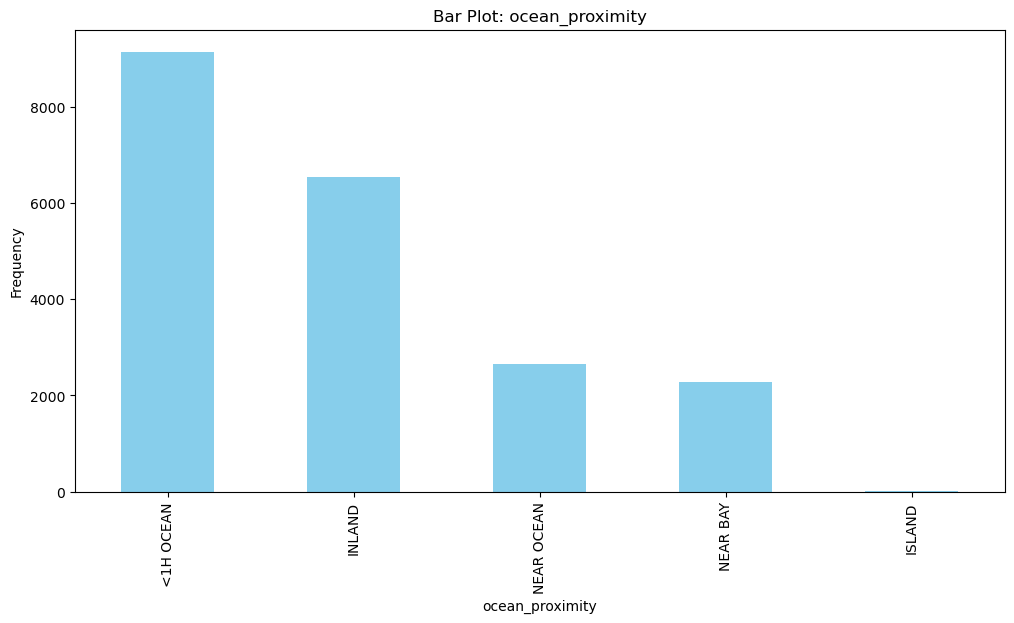

In [141]:
univariate_categorical_analysis(df0, 'ocean_proximity')

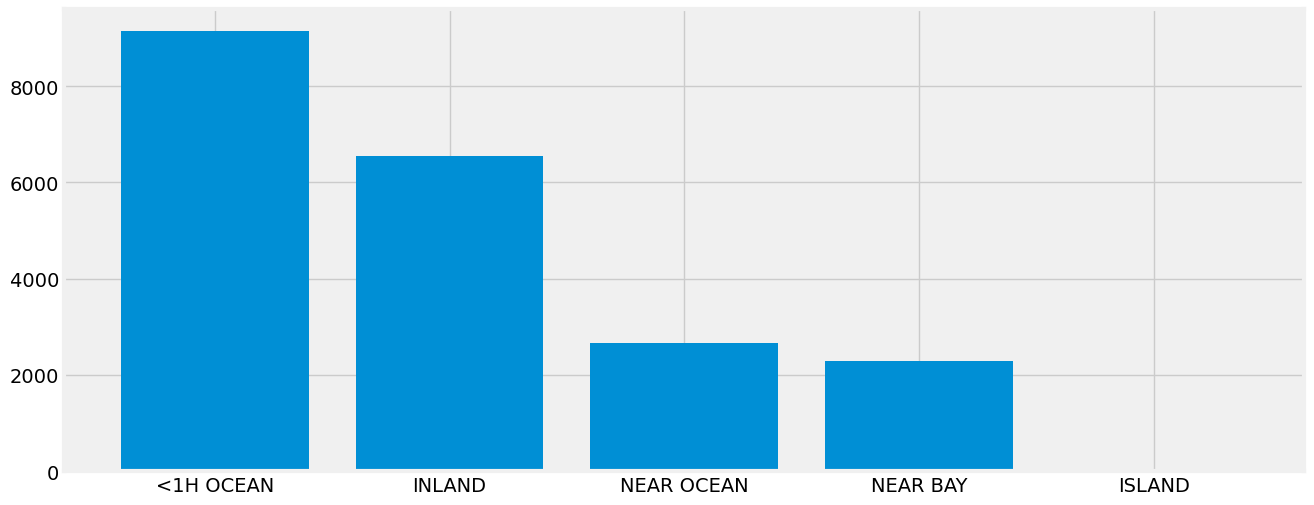

In [142]:
model_counts=df0["ocean_proximity"].value_counts()
top10=model_counts[0:10]
plt.figure(figsize=(16,6))
plt.style.use("fivethirtyeight")
plt.bar(top10.index,top10.values)
plt.show()

--------------------------------------------------------------------------------------------------------

3.1.1 (b) Feature 2 - (year)

Frequency count for year
2017    4846
2018    3978
2019    3179
2016    2262
2015    1308
2014     785
2013     583
2020     245
2012      94
2011      65
2009      52
2010      31
2008      29
2007      14
2006       6
2005       5
2004       2
1996       1
1998       1
2002       1
2000       1
2060       1
2003       0
Name: year, dtype: int64

Percentage distribution for year
2017    27.708846
2018    22.745726
2019    18.177140
2016    12.933844
2015     7.478987
2014     4.488536
2013     3.333524
2020     1.400881
2012     0.537481
2011     0.371662
2009     0.297330
2010     0.177254
2008     0.165819
2007     0.080050
2006     0.034307
2005     0.028589
2004     0.011436
1996     0.005718
1998     0.005718
2002     0.005718
2000     0.005718
2060     0.005718
2003     0.000000
Name: year, dtype: float64



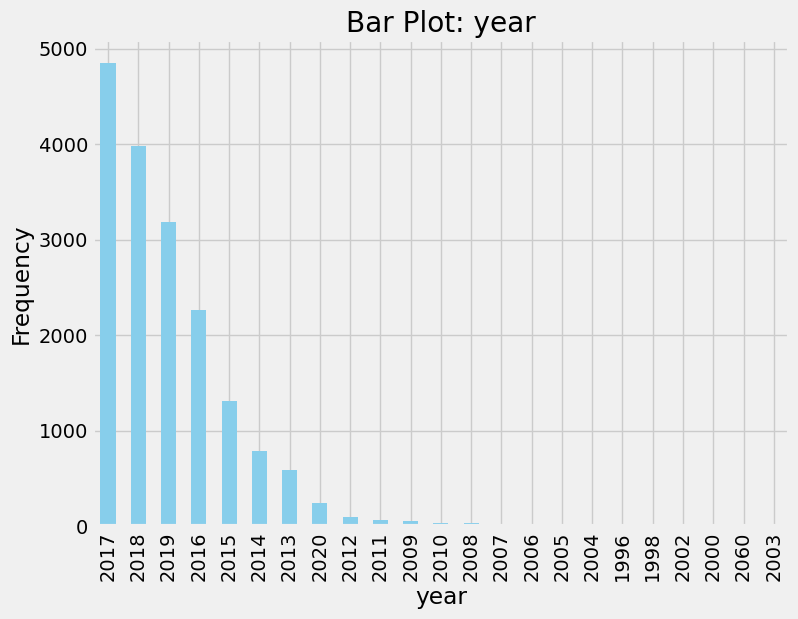

In [29]:
univariate_categorical_analysis(df0, 'another_categorical_column_if_needed')

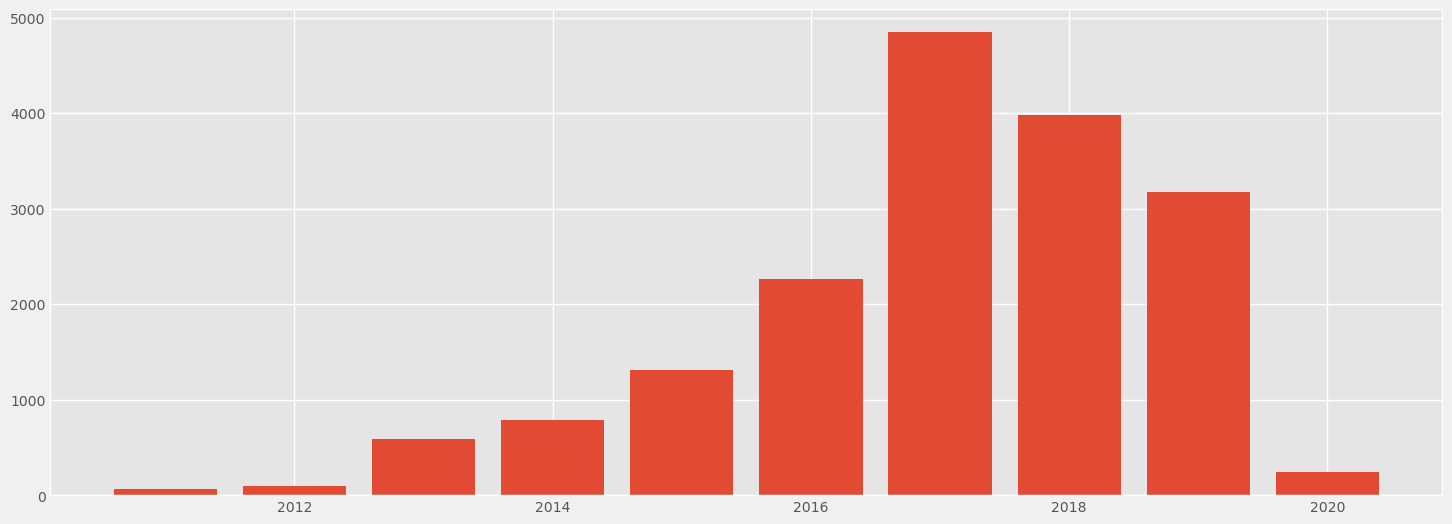

In [30]:
year_counts=df['year'].value_counts()
year10=year_counts[0:10]
plt.figure(figsize=(16,6))
plt.style.use("ggplot")
plt.bar(year10.index,year10.values)
plt.show()

Top 10years count

--------------------------------------------------------------------------------------------------------

**3.2.1(b) Univariate Analysis - Continuos Features**

In [143]:
numerical_columns = df0.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [180]:
def univariate_numerical_analysis(df, column):
    # Measures of central tendency
    print("Measures of central tendency for", column)
    print("Mean:", df[column].mean())
    print("Median:", df[column].median())
    print("Mode:", df[column].mode().values[0])
    print()

    # Measures of dispersion
    print("Measures of dispersion for", column)
    print("Standard Deviation:", df[column].std())
    print("Range:", df[column].max() - df[column].min())
    print()

    # Histogram
    plt.figure(figsize=(14, 6))
    plt.hist(df[column], bins=12, color='purple', edgecolor='black')
    plt.title("Histogram: " + column)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

Measures of central tendency for housing_median_age
Mean: 28.638610263119638
Median: 29.0
Mode: 52

Measures of dispersion for housing_median_age
Standard Deviation: 12.585487391956175
Range: 51



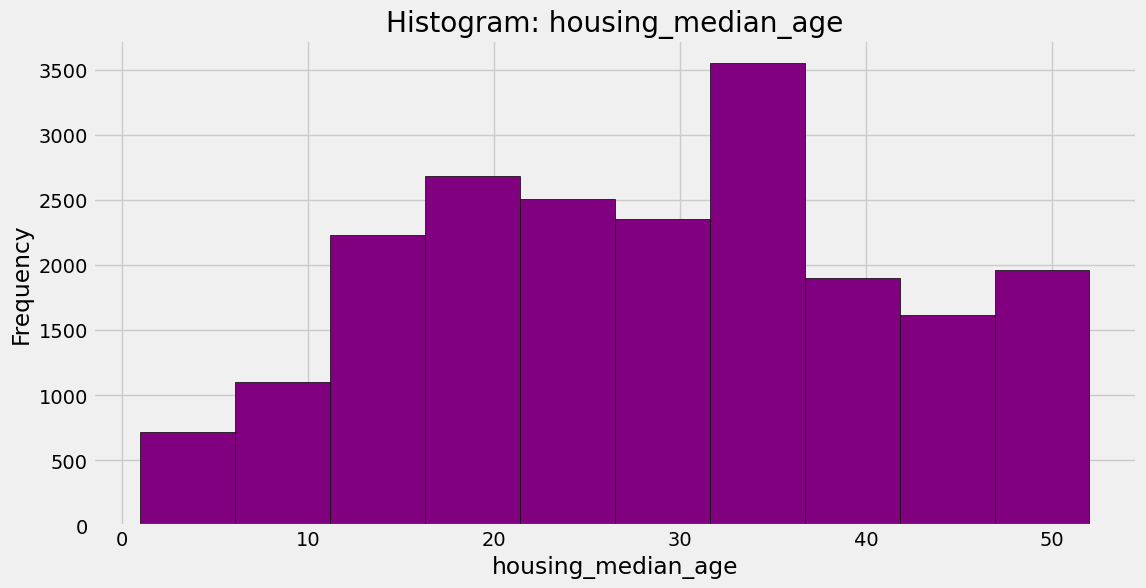

In [161]:
univariate_numerical_analysis(df0, 'housing_median_age')

--------------------------------------------------------------------------------

Measures of central tendency for total_rooms
Mean: 2634.8134632160513
Median: 2127.0
Mode: 1527.0

Measures of dispersion for total_rooms
Standard Deviation: 2180.3370630746513
Range: 39318.0



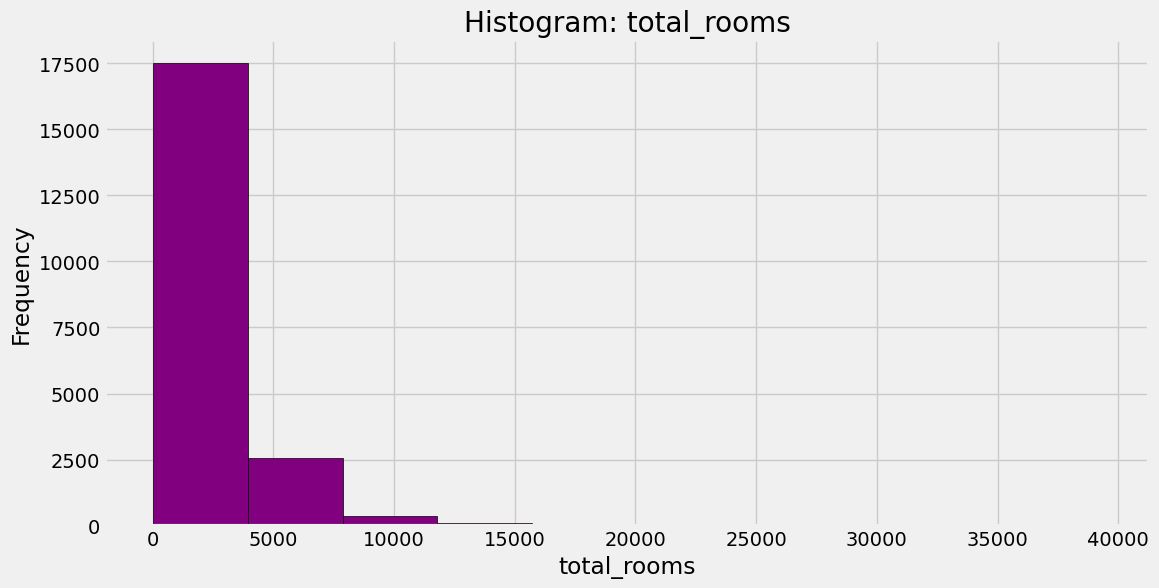

In [160]:
univariate_numerical_analysis(df0, 'total_rooms')

--------------------------------------------------------------------------------

Measures of central tendency for total_bedrooms
Mean: 537.8822809593734
Median: 438.0
Mode: 537.8822809593735

Measures of dispersion for total_bedrooms
Standard Deviation: 419.2954304196665
Range: 6444.0



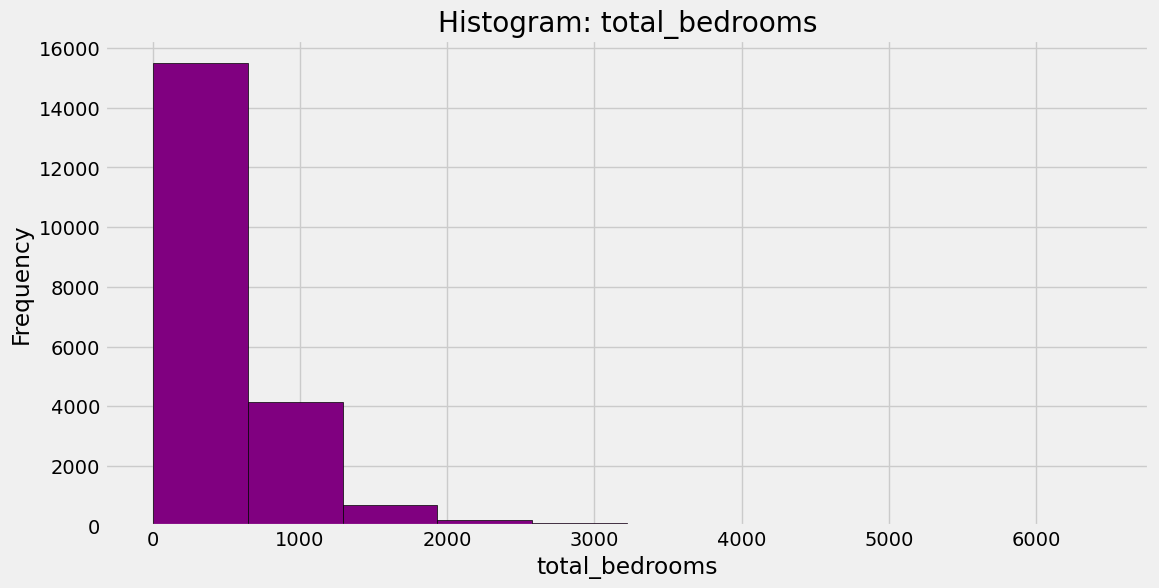

In [162]:
univariate_numerical_analysis(df0, 'total_bedrooms')

Here we can see that tax goes into Negative,hence we need to remove the negative values


Measures of central tendency for population
Mean: 1425.5000726849833
Median: 1166.0
Mode: 891

Measures of dispersion for population
Standard Deviation: 1132.5395925657142
Range: 35679



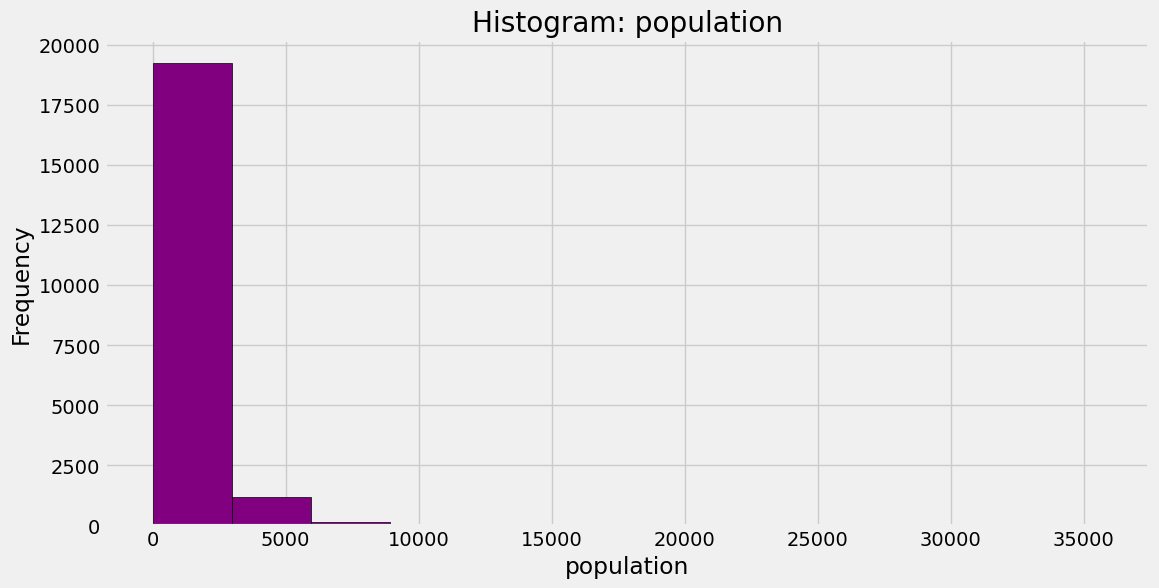

In [164]:
univariate_numerical_analysis(df0, 'population')

<Axes: xlabel='population', ylabel='Count'>

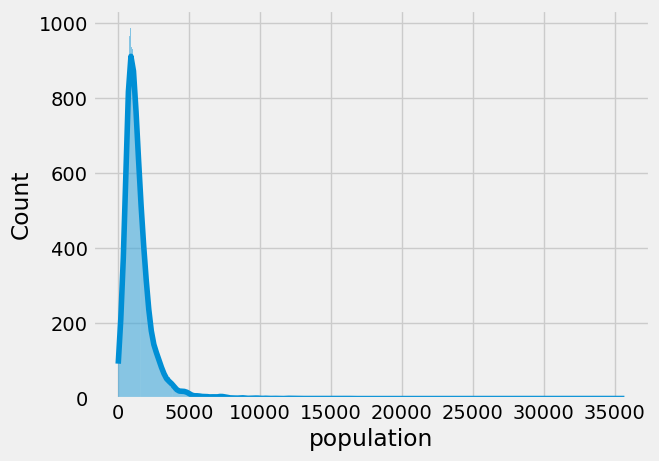

In [176]:
import seaborn as sns

sns.histplot(data=df0,x="population",kde=True)

--------------------------------------------------------------------------------

Measures of central tendency for households
Mean: 499.54508891796286
Median: 409.0
Mode: 306

Measures of dispersion for households
Standard Deviation: 382.3567340746143
Range: 6081



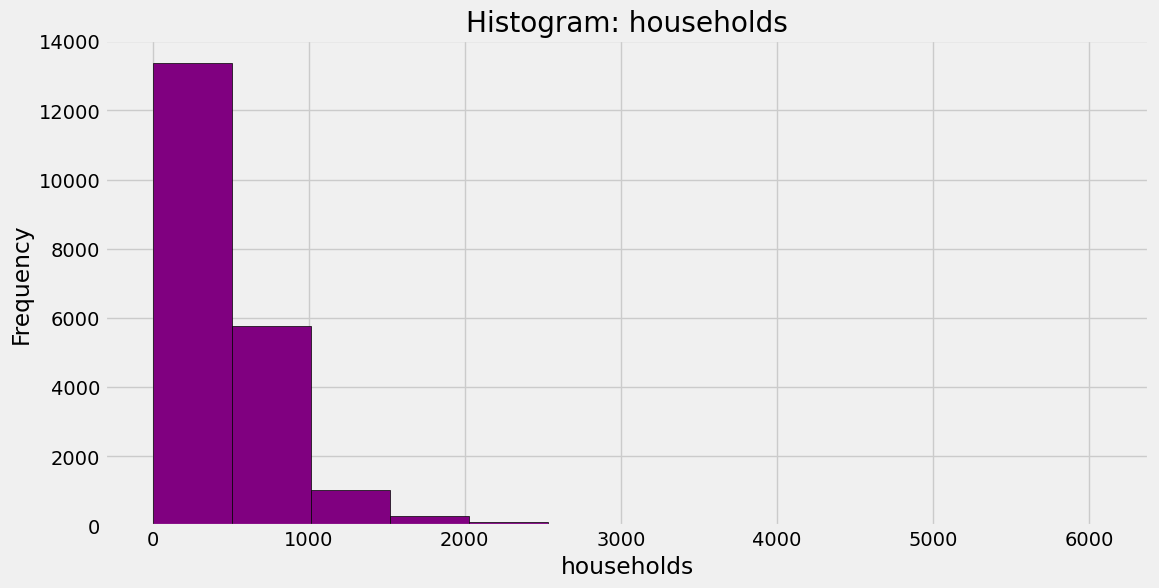

In [177]:
#households

univariate_numerical_analysis(df0, 'households')

Measures of central tendency for median_income
Mean: 4.17057049871565
Median: 3.8352
Mode: 3.425

Measures of dispersion for median_income
Standard Deviation: 1.8996537347433664
Range: 14.5002



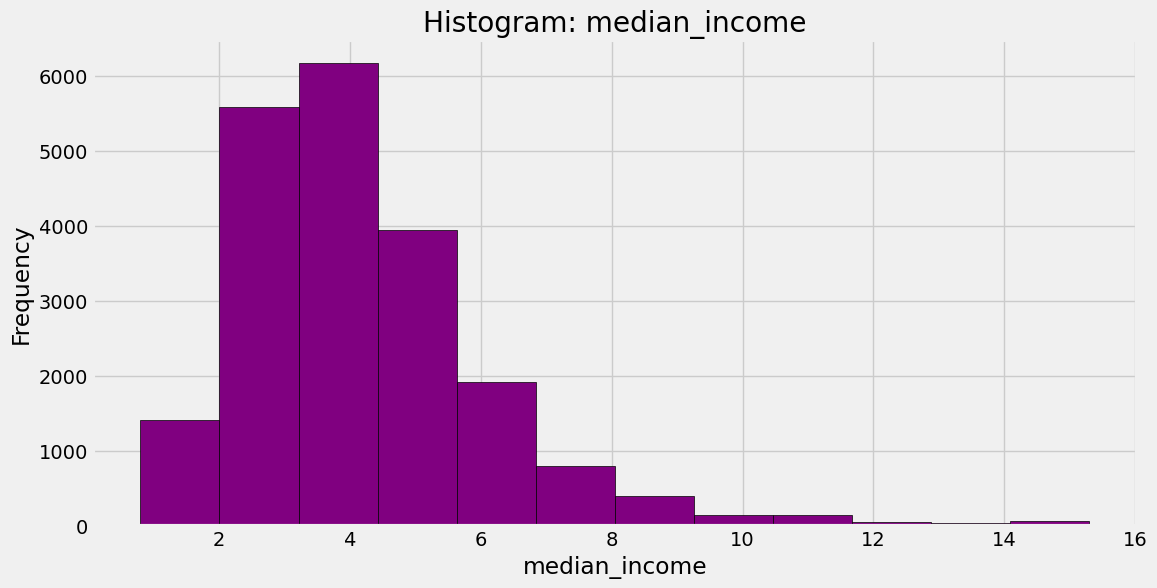

In [178]:
#median_income

univariate_numerical_analysis(df0, 'median_income')

Measures of central tendency for median_house_value
Mean: 207145.44560740417
Median: 180000.0
Mode: 500301

Measures of dispersion for median_house_value
Standard Deviation: 115400.69506540643
Range: 485002



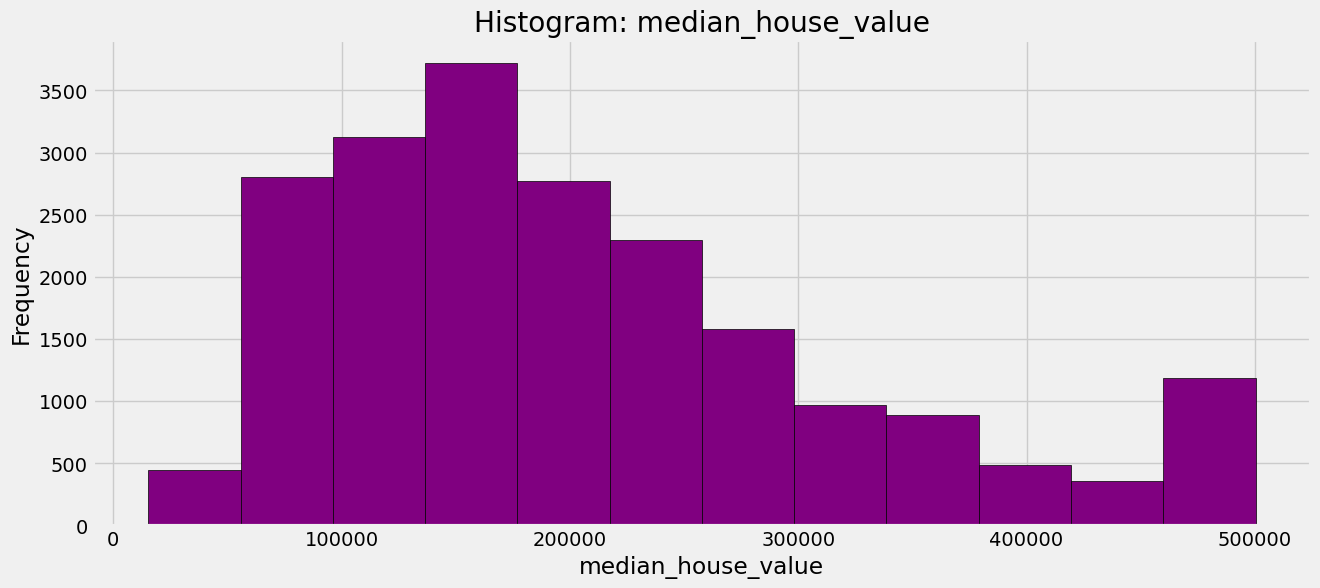

In [181]:
#median_house_value

univariate_numerical_analysis(df0, 'median_house_value')

-----------------------------------------------------------------------------------------------

**3.2.2 Bivariate Analysis**

In [182]:
numerical_columns = df0.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

**3.2.2 (a) median_house_age_vs_median_value:**

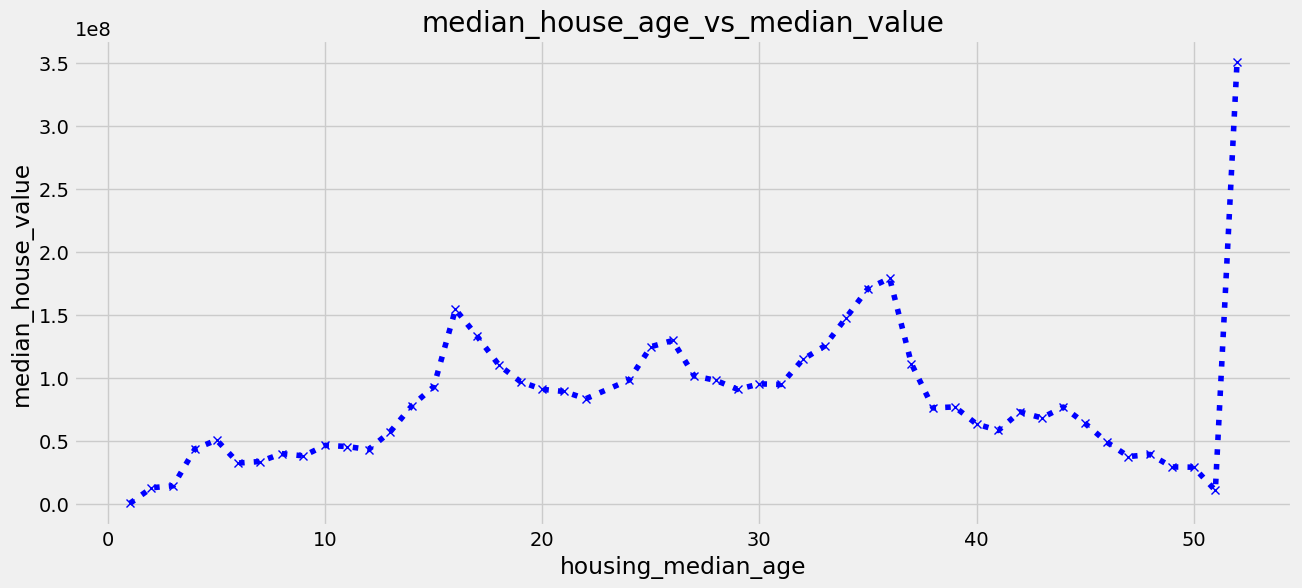

In [229]:
b=df0.groupby('housing_median_age')['median_house_value'].sum().reset_index()

b1=b.sort_values(by='housing_median_age')
b1=b1.drop(22)


x=b1['housing_median_age']
y=b1['median_house_value']
plt.figure(figsize=(14, 6))
plt.plot(x,y,"x:b")
plt.xlabel("housing_median_age")
plt.ylabel("median_house_value")
plt.title("median_house_age_vs_median_value")
plt.show()

In [215]:
df0[["housing_median_age", "median_house_value"]][df0["housing_median_age"] > 50].sort_values(by='median_house_value').value_counts()

housing_median_age  median_house_value
52                  500301                170
                    350300                 19
                    225300                 15
                    162800                 14
                    112800                 13
                                         ... 
                    211800                  1
                    71600                   1
                    213400                  1
                    213500                  1
51                  52200                   1
Name: count, Length: 839, dtype: int64

In [240]:
df0.head()

id  longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   1    -122.23     37.88                  41        880.0           129.0   
1   2    -122.22     37.86                  21       7099.0          1106.0   
2   3    -122.24     37.85                  52       1467.0           190.0   
3   4    -122.25     37.85                  52       1274.0           235.0   
4   5    -122.25     37.85                  52       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.6252              452900        NEAR BAY  
1        2401        1138         8.6014              358800        NEAR BAY  
2         496         177         7.5574              352400        NEAR BAY  
3         558         219         5.9431              341600        NEAR BAY  
4         565         259         4.1462              342500        NEAR BAY

**3.2.2 (b) median_income vs median_house_value**

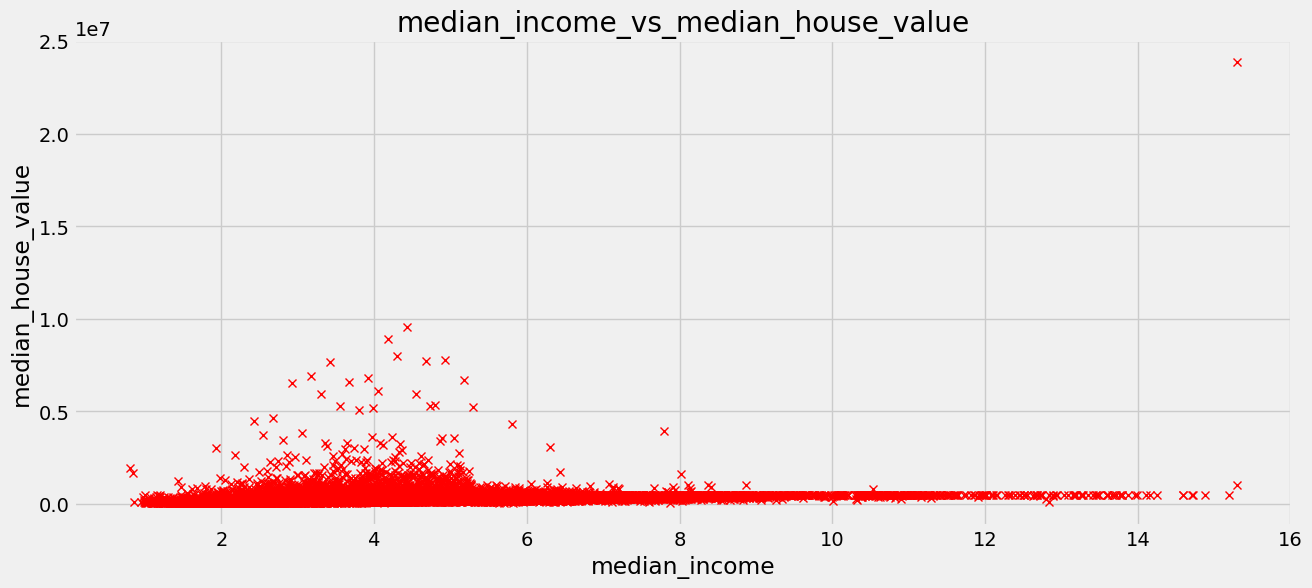

In [230]:
b=df0.groupby('median_income')['median_house_value'].sum().reset_index()

b1=b.sort_values(by='median_income')
b1=b1.drop(22)


x=b1['median_income']
y=b1['median_house_value']
plt.figure(figsize=(14, 6))
plt.plot(x,y,"xr")
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.title("median_income_vs_median_house_value")
plt.show()

In [243]:
df0.head(15)

id  longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    1    -122.23     37.88                  41        880.0           129.0   
1    2    -122.22     37.86                  21       7099.0          1106.0   
2    3    -122.24     37.85                  52       1467.0           190.0   
3    4    -122.25     37.85                  52       1274.0           235.0   
4    5    -122.25     37.85                  52       1627.0           280.0   
5    6    -122.25     37.85                  52        919.0           213.0   
6    7    -122.25     37.84                  52       2535.0           489.0   
7    8    -122.25     37.84                  52       3104.0           687.0   
8    9    -122.26     37.84                  42       2555.0           665.0   
9   10    -122.25     37.84                  52       3549.0           707.0   
10  11    -122.26     37.85                  52       2202.0           434.0   
11  12    -122.26     37.85                  52       3503.0           752.0   
12  13    -122.26     37.85                  52       2491.0           474.0   
13  14    -122.26     37.84                  52        696.0           191.0   
14  15    -122.26     37.85                  52       2643.0           626.0   

    population  households  median_income  median_house_value ocean_proximity  
0          322         126         8.6252              452900        NEAR BAY  
1         2401        1138         8.6014              358800        NEAR BAY  
2          496         177         7.5574              352400        NEAR BAY  
3          558         219         5.9431              341600        NEAR BAY  
4          565         259         4.1462              342500        NEAR BAY  
5          413         193         4.3368              270000        NEAR BAY  
6         1094         514         3.9591              299500        NEAR BAY  
7         1157         647         3.4200              241700        NEAR BAY  
8         1206         595         2.3804              227000        NEAR BAY  
9         1551         714         3.9912              261400        NEAR BAY  
10         910         402         3.5031              281800        NEAR BAY  
11        1504         734         3.5705              242100        NEAR BAY  
12        1098         468         3.3750              213800        NEAR BAY  
13         345         174         2.9736              191600        NEAR BAY  
14        1212         620         2.2167              159500        NEAR BAY

In [252]:
df0["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9144
INLAND        6545
NEAR OCEAN    2658
NEAR BAY      2285
ISLAND           5
Name: count, dtype: int64

**3.2.2 (c) (i). Pie Chart - Checking the percentage of households with respect to the ocean_proximity**

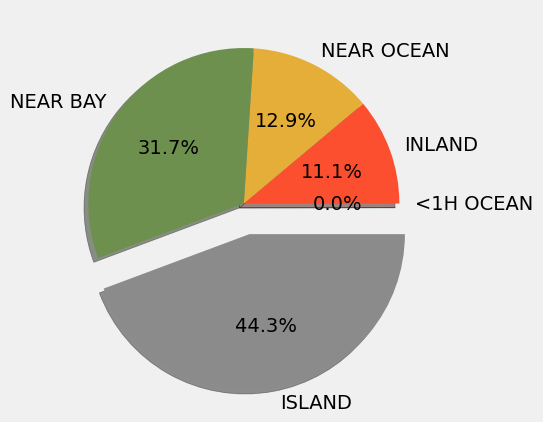

In [264]:
c=df0.groupby('ocean_proximity')['households'].count().reset_index()
c1=c.sort_values(by='households')
y=c1['households']

labels=['<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND']

myexplode=[0,0,0,0,0.2]

plt.pie(y, labels=labels, explode = myexplode, shadow=True, autopct='%1.1f%%')
plt.show()

**3.2.2 (c) (ii). Scatter Plot - Checking the percentage of households with respect to the ocean_proximity**

In [277]:
d=df0.groupby('ocean_proximity')['households'].count().reset_index()
d1=d.sort_values(by='households')
size=[100, 200, 400, 800, 1600]
color=[1, 2, 3, 4, 5]
px.scatter(d1, x='ocean_proximity', y='households',size=size, color=color)

In [ ]:
##Other ways to use the scatterplot

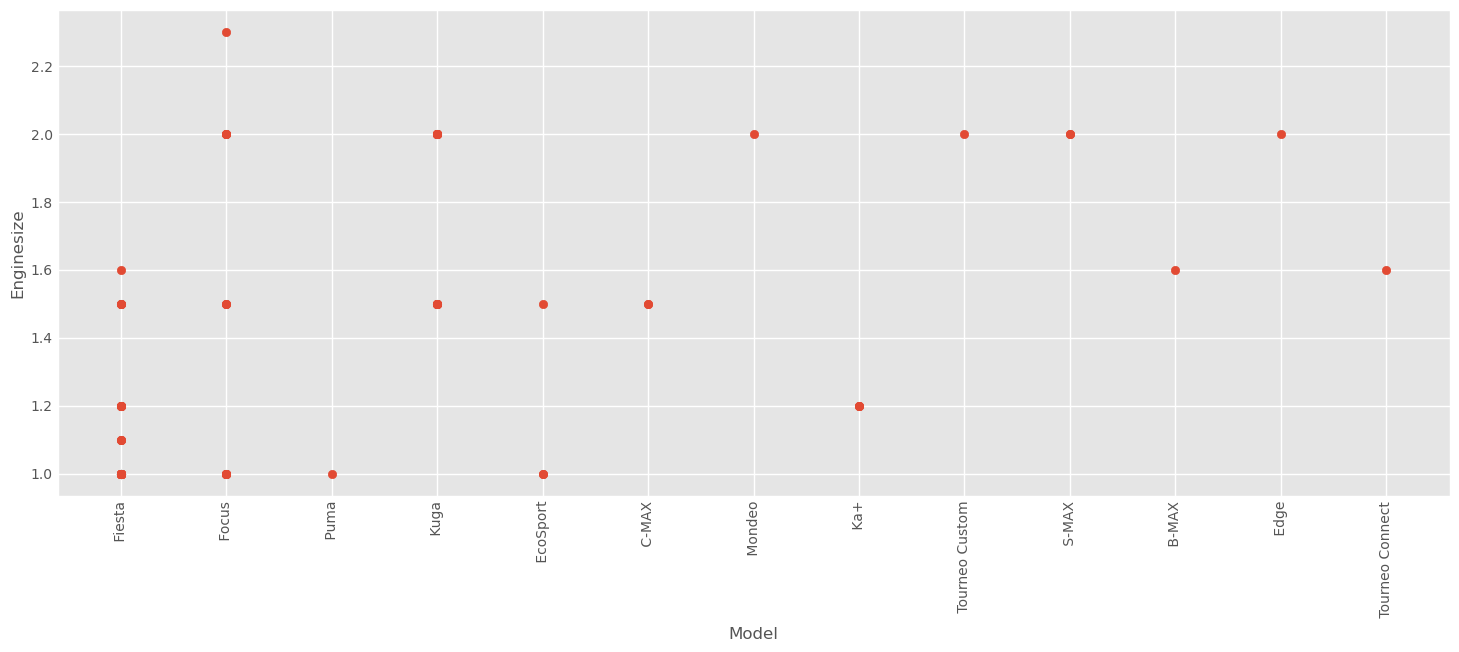

In [59]:
#Example below:

plt.figure(figsize=(16,6))
plt.scatter(df["model"].iloc[0:100],df["engineSize"].iloc[0:100])
plt.xlabel("Model")
plt.ylabel("Enginesize")
plt.xticks(rotation=90)
plt.show()

### 3.3 Correlation Analysis

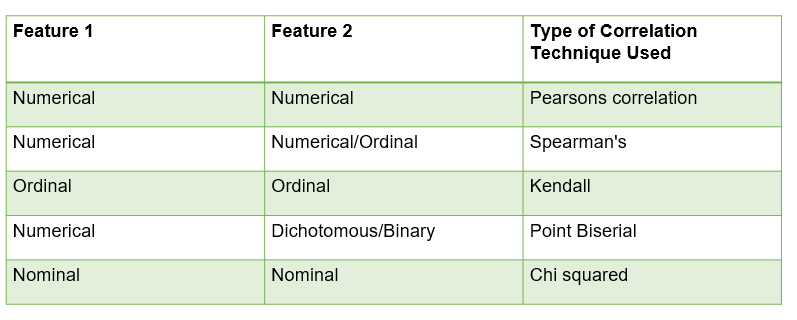

**3.3.0 Correlation Analysis - Continuos Features**

In [ ]:
numerical_columns = df0.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

In [292]:
numerical_columns = df0.select_dtypes(include=['int64', 'float64']).columns


df0[numerical_columns].corr() #for numerical data, we can directly use corr() function

id  longitude  latitude  housing_median_age  \
id                  1.000000  -0.113450  0.081278           -0.181022   
longitude          -0.113450   1.000000 -0.924664           -0.108097   
latitude            0.081278  -0.924664  1.000000            0.011081   
housing_median_age -0.181022  -0.108097  0.011081            1.000000   
total_rooms         0.061240   0.044480 -0.035851           -0.360843   
total_bedrooms      0.031956   0.069261 -0.066668           -0.319008   
population          0.024863   0.099758 -0.108775           -0.296234   
households          0.030207   0.055314 -0.071044           -0.302931   
median_income       0.071579  -0.015214 -0.079701           -0.119196   
median_house_value  0.072077  -0.045939 -0.144174            0.105580   

                    total_rooms  total_bedrooms  population  households  \
id                     0.061240        0.031956    0.024863    0.030207   
longitude              0.044480        0.069261    0.099758    0.055314   
latitude              -0.035851       -0.066668   -0.108775   -0.071044   
housing_median_age    -0.360843       -0.319008   -0.296234   -0.302931   
total_rooms            1.000000        0.927056    0.856667    0.918221   
total_bedrooms         0.927056        1.000000    0.873911    0.974725   
population             0.856667        0.873911    1.000000    0.907224   
households             0.918221        0.974725    0.907224    1.000000   
median_income          0.197490       -0.007629    0.004910    0.013080   
median_house_value     0.133678        0.049471   -0.024636    0.065852   

                    median_income  median_house_value  
id                       0.071579            0.072077  
longitude               -0.015214           -0.045939  
latitude                -0.079701           -0.144174  
housing_median_age      -0.119196            0.105580  
total_rooms              0.197490            0.133678  
total_bedrooms          -0.007629            0.049471  
population               0.004910           -0.024636  
households               0.013080            0.065852  
median_income            1.000000            0.687976  
median_house_value       0.687976            1.000000

**3.3.1 Correlation Heat Map - Continuos Features**

In [ ]:
## Example of seaborn heatmap:

sns.heatmap(df0[num_column].corr(),
           annot=True,
           cmap="viridis")

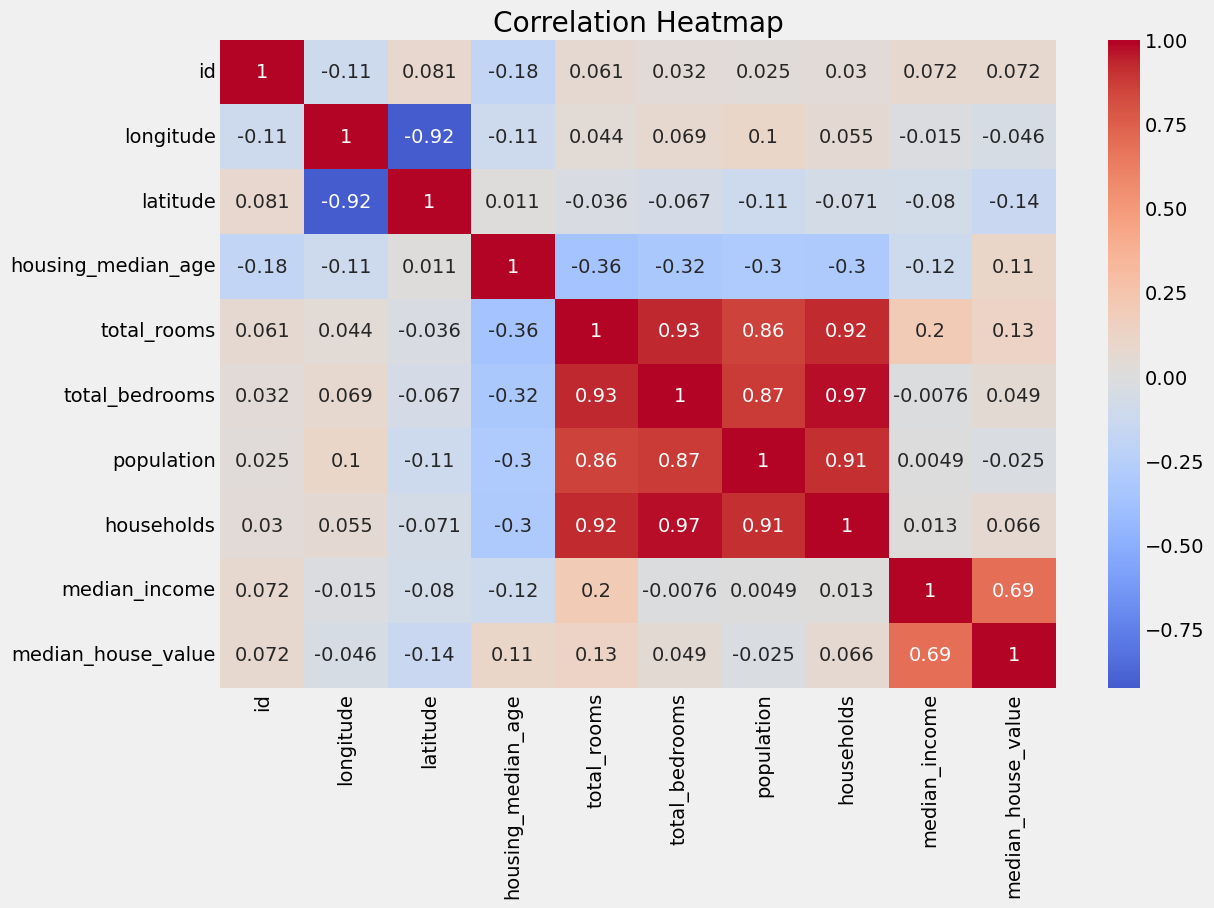

In [285]:
numerical_columns = df0.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df0[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [306]:
print(df0.columns)

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [ ]:
## Removing the correlated columns "total_bedrooms" and "population" from the dataframe:

df0.pop("total_bedrooms")

In [315]:
df0.pop("population")

df0

id  longitude  latitude  housing_median_age  total_rooms  \
0          1    -122.23     37.88                  41        880.0   
1          2    -122.22     37.86                  21       7099.0   
2          3    -122.24     37.85                  52       1467.0   
3          4    -122.25     37.85                  52       1274.0   
4          5    -122.25     37.85                  52       1627.0   
...      ...        ...       ...                 ...          ...   
20632  20636    -121.09     39.48                  25       1665.0   
20633  20637    -121.21     39.49                  18        697.0   
20634  20638    -121.22     39.43                  17       2254.0   
20635  20639    -121.32     39.43                  18       1860.0   
20636  20640    -121.24     39.37                  16       2785.0   

       households  median_income  median_house_value ocean_proximity  
0             126         8.6252              452900        NEAR BAY  
1            1138         8.6014              358800        NEAR BAY  
2             177         7.5574              352400        NEAR BAY  
3             219         5.9431              341600        NEAR BAY  
4             259         4.1462              342500        NEAR BAY  
...           ...            ...                 ...             ...  
20632         330         1.8603               78400          INLAND  
20633         114         2.8568               77400          INLAND  
20634         433         2.0000               92600          INLAND  
20635         349         2.1672               85000          INLAND  
20636         530         2.6886               89700          INLAND  

[20637 rows x 9 columns]

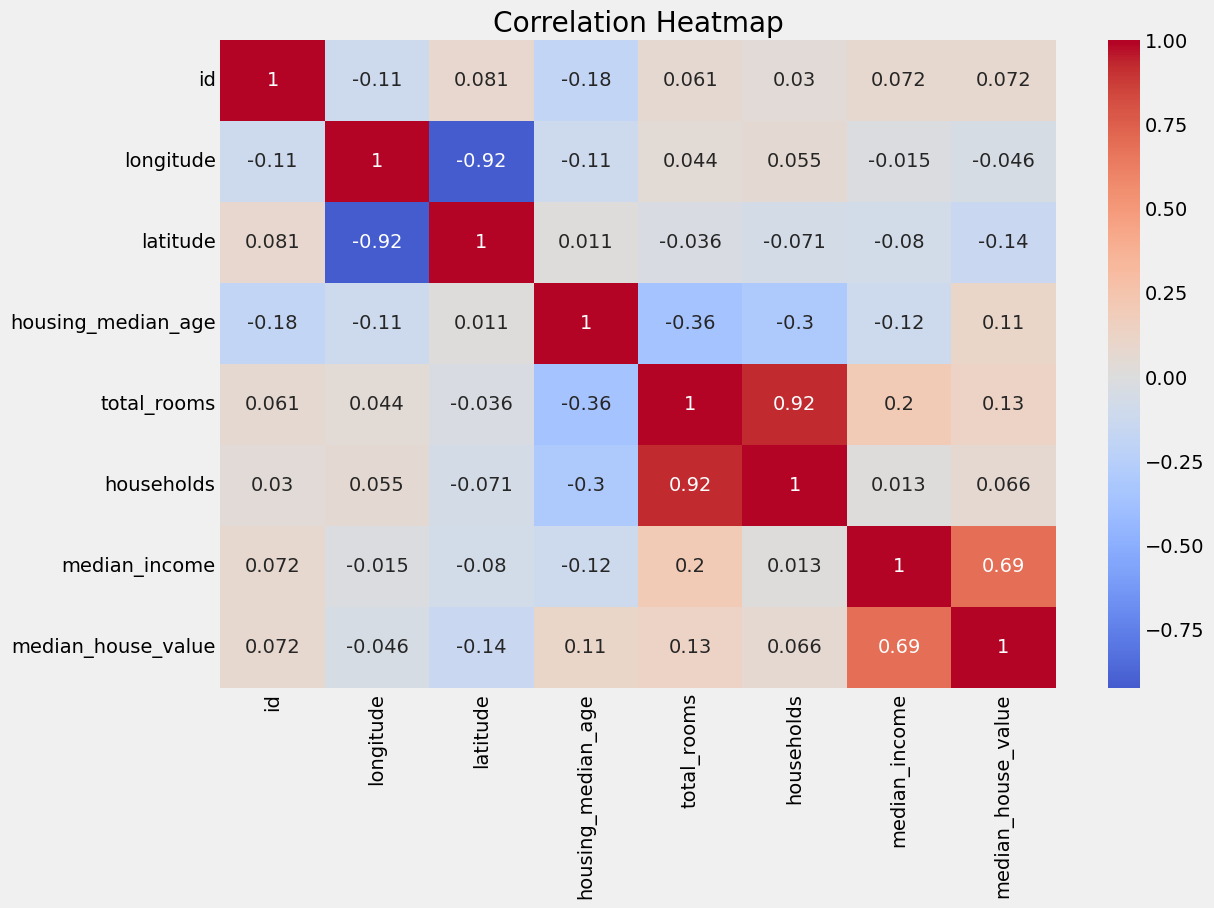

In [319]:
##Updated heatmap of continuos columns:

numerical_columns = df0.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df0[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


**3.3.2.Pearsons Correlation - for Continuos and Continuos Correlation Analysis**

<span style="color: blue">1. Between features and label </span>

<span style="color: blue">2. Between a feature and another feature</span>

In [317]:
numerical_columns = df0.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'households', 'median_income', 'median_house_value'],
      dtype='object')

In [318]:
import scipy.stats
x = df0['median_house_value']
y = df0['housing_median_age']
pearsoncorr=scipy.stats.pearsonr(x, y)    
pearsoncorr

PearsonRResult(statistic=0.1055803153112756, pvalue=3.0900329710425105e-52)

<span style="color:red"> ☝️☝️ Correlation Note: The housing value and housing age are not strongly correlated ☝️☝️

### <span style="color: red;">Project action items:</span>
    
   ~1. Process the missing values from the column~
   
   ~2. No duplicated rows, so action items~
   
  ~3. Based on the outlier findings, treat the outliers~
   
   ~4. Remove unnecessary columns~
   
   ~5. Change the "ocean_proximity" to "category" type~
   
   ~6. Remove the highly correlated columns:~
      
   ~(i) total rooms and total bedrooms are highly correlated.~
      
     
   ~(ii) population of the block and households are highly correlated.~

**3.3.3 Spearman Correlation - for Continuos and Categorical Correlation Analysis**

In [321]:
categorical_columns = df0.select_dtypes(include=['object','category']).columns
categorical_columns

Index(['ocean_proximity'], dtype='object')

In [322]:
numerical_columns = df0.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'households', 'median_income', 'median_house_value'],
      dtype='object')

In [289]:
from scipy.stats import spearmanr

In [324]:
# Calculate Spearman's rank correlation between housing value and ocean proximity

correlation, p_value = spearmanr(df0['median_house_value'], df0['ocean_proximity'])

print("Spearman's rank correlation:", correlation)
print("P-value:", p_value)

Spearman's rank correlation: -0.13276516137018218
P-value: 8.59411088500451e-82


<span style="color:blue"> ☝️☝️ Correlation Note: The housing value and ocean_proximity are negatively correlated but not strongly ☝️☝️

-----------------------------------------------------------------------------------------------

# 4. Splitting the feature and label

In [326]:
df0.columns

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'households', 'median_income', 'median_house_value', 'ocean_proximity'],
      dtype='object')

In [327]:
X=df0.drop(columns=["median_house_value"]) # independent variable
y=df0['median_house_value'] # dependent variable

In [328]:
X

id  longitude  latitude  housing_median_age  total_rooms  \
0          1    -122.23     37.88                  41        880.0   
1          2    -122.22     37.86                  21       7099.0   
2          3    -122.24     37.85                  52       1467.0   
3          4    -122.25     37.85                  52       1274.0   
4          5    -122.25     37.85                  52       1627.0   
...      ...        ...       ...                 ...          ...   
20632  20636    -121.09     39.48                  25       1665.0   
20633  20637    -121.21     39.49                  18        697.0   
20634  20638    -121.22     39.43                  17       2254.0   
20635  20639    -121.32     39.43                  18       1860.0   
20636  20640    -121.24     39.37                  16       2785.0   

       households  median_income ocean_proximity  
0             126         8.6252        NEAR BAY  
1            1138         8.6014        NEAR BAY  
2             177         7.5574        NEAR BAY  
3             219         5.9431        NEAR BAY  
4             259         4.1462        NEAR BAY  
...           ...            ...             ...  
20632         330         1.8603          INLAND  
20633         114         2.8568          INLAND  
20634         433         2.0000          INLAND  
20635         349         2.1672          INLAND  
20636         530         2.6886          INLAND  

[20637 rows x 8 columns]

In [329]:
y

0        452900
1        358800
2        352400
3        341600
4        342500
          ...  
20632     78400
20633     77400
20634     92600
20635     85000
20636     89700
Name: median_house_value, Length: 20637, dtype: int64

# 5. Feature Engineering

### 5.0 (a) Column Renaming:

In [ ]:
# ignore the variable names - case-1 > change columns names

# X.rename(columns={'instant':'rec_id','dteday':'datetime','holiday':'is_holiday','workingday':'is_workingday',
#                         'weathersit':'weather_condition','hum':'humidity','mnth':'month',
#                         'cnt':'total_count','hr':'hour','yr':'year'}, inplace=True)

In [ ]:
# ignore the variable names - case-2 > replace columns values to something which makes sense. 

# X.weather_condition.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
# X.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
# X.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

### 5.0 (b) Drop irrelevant features:

In [ ]:
# ignore the variable names

# X= X.drop(["rec_id", "datetime"], axis=1)

### 5.0 (c) Converting categoricals features to "category" data type

In [330]:
# Convert categorical variables to category data type

# ignore the variable names

X['ocean_proximity'] = X['ocean_proximity'].astype('category')

In [340]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20637 entries, 0 to 20636
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  20637 non-null  int64   
 1   longitude           20637 non-null  float64 
 2   latitude            20637 non-null  float64 
 3   housing_median_age  20637 non-null  int64   
 4   total_rooms         20637 non-null  float64 
 5   households          20637 non-null  int64   
 6   median_income       20637 non-null  float64 
 7   ocean_proximity     20637 non-null  category
dtypes: category(1), float64(4), int64(3)
memory usage: 1.1 MB


### 5.1 Encoding:

<span style="color: blue;"> <b> Encoding Note:</b> </span>

<span style="color: blue;"> 1. One hot encoding: for Nominal category </span>

<span style="color: blue;"> 2. Label encoding: for Ordinal category </span>

**5.1.1 One hot encoding**

To convert categorical feature into a numerical format.

In [63]:
# categorical_columns = df.select_dtypes(include=['object']).columns

# Can use this variable in the one hot encoding function below.

In [379]:
X_encoded=pd.get_dummies(X,columns=["ocean_proximity"],drop_first=True)

In [380]:
X_encoded

id  longitude  latitude  housing_median_age  total_rooms  \
0          1    -122.23     37.88                  41        880.0   
1          2    -122.22     37.86                  21       7099.0   
2          3    -122.24     37.85                  52       1467.0   
3          4    -122.25     37.85                  52       1274.0   
4          5    -122.25     37.85                  52       1627.0   
...      ...        ...       ...                 ...          ...   
20632  20636    -121.09     39.48                  25       1665.0   
20633  20637    -121.21     39.49                  18        697.0   
20634  20638    -121.22     39.43                  17       2254.0   
20635  20639    -121.32     39.43                  18       1860.0   
20636  20640    -121.24     39.37                  16       2785.0   

       households  median_income  ocean_proximity_INLAND  \
0             126         8.6252                   False   
1            1138         8.6014                   False   
2             177         7.5574                   False   
3             219         5.9431                   False   
4             259         4.1462                   False   
...           ...            ...                     ...   
20632         330         1.8603                    True   
20633         114         2.8568                    True   
20634         433         2.0000                    True   
20635         349         2.1672                    True   
20636         530         2.6886                    True   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       False                      True   
1                       False                      True   
2                       False                      True   
3                       False                      True   
4                       False                      True   
...                       ...                       ...   
20632                   False                     False   
20633                   False                     False   
20634                   False                     False   
20635                   False                     False   
20636                   False                     False   

       ocean_proximity_NEAR OCEAN  
0                           False  
1                           False  
2                           False  
3                           False  
4                           False  
...                           ...  
20632                       False  
20633                       False  
20634                       False  
20635                       False  
20636                       False  

[20637 rows x 11 columns]

In [381]:
X_encoded.columns

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'households', 'median_income', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

**5.1.2 Label encoding - Example**

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# df['categorical_encoded'] = label_encoder.fit_transform(df['categorical_column'])

### 5.2 Binning

### 5.3 Interaction Term

### 5.4 Dimensionality  Reduction and PCA

# 6. Standardisation for Data Consistency


<span style="color: blue;"> Import from sklearn.preprocessing: </span>

   <span style="color: blue;"> 1. MinMaxScalerMinMaxScaler: Better when data size is small. Avoid when there are outliers in the data. **Never touch the target variable.**</span>
    
   <span style="color: blue;"> 2. StandardScaler: Good to use in general cases. </span>


**Benefits for Standardisation/Normalization (Scaling down)**

    1. To make the variable unitless
    2. To compare the variables on the same scale
    3. They help in optimization of the model. Ex - Age, Salary

**Standardisation** - mean = 0, std = 1 (z-score = (x - mu) / sigma) 

**Normalization** - min = 0, max = 1 ((x - min) / (max - min))

**fit** -> it will only learn from the variable 

**fit_transform** -> it will learn + transform the original variable

In [384]:
from sklearn.preprocessing import StandardScaler

X_numerical_columns = X_encoded.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

X_encoded[X_numerical_columns] = scaler.fit_transform(X_encoded[X_numerical_columns]) #assigning standardised numerical columns back to 

In [385]:
X_encoded

id  longitude  latitude  housing_median_age  total_rooms  \
0     -1.732123  -1.327833  1.052507            0.982218    -0.804855   
1     -1.731955  -1.322842  1.043144           -0.606953     2.047525   
2     -1.731788  -1.332824  1.038462            1.856262    -0.535624   
3     -1.731620  -1.337815  1.038462            1.856262    -0.624145   
4     -1.731452  -1.337815  1.038462            1.856262    -0.462239   
...         ...        ...       ...                 ...          ...   
20632  1.731614  -0.758838  1.801587           -0.289119    -0.444811   
20633  1.731782  -0.818732  1.806269           -0.845328    -0.888789   
20634  1.731950  -0.823723  1.778178           -0.924787    -0.174662   
20635  1.732118  -0.873635  1.778178           -0.845328    -0.355373   
20636  1.732286  -0.833706  1.750088           -1.004245     0.068884   

       households  median_income  ocean_proximity_INLAND  \
0       -0.976978       2.345026                   False   
1        1.669829       2.332497                   False   
2       -0.843592       1.782910                   False   
3       -0.733744       0.933103                   False   
4       -0.629127      -0.012829                   False   
...           ...            ...                     ...   
20632   -0.443432      -1.216183                    True   
20633   -1.008363      -0.691601                    True   
20634   -0.174043      -1.142641                    True   
20635   -0.393739      -1.054623                    True   
20636    0.079652      -0.780146                    True   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       False                      True   
1                       False                      True   
2                       False                      True   
3                       False                      True   
4                       False                      True   
...                       ...                       ...   
20632                   False                     False   
20633                   False                     False   
20634                   False                     False   
20635                   False                     False   
20636                   False                     False   

       ocean_proximity_NEAR OCEAN  
0                           False  
1                           False  
2                           False  
3                           False  
4                           False  
...                           ...  
20632                       False  
20633                       False  
20634                       False  
20635                       False  
20636                       False  

[20637 rows x 11 columns]

<span style="color: blue;"> 

☝️☝️ 

**scaler.fit()** -> It will learn from the variable/s + transform -> Apply the changes on the variable/s based on whatever is learned

**scaler.fit_transform()** -> It will learn and apply the changes simultaneously on the variable/s

Machine learning models often require data to be in a specific format in order to be able to effectively learn from it. 
    
For example, some machine learning models require numerical data, while others require categorical data.
Transformers are a type of algorithm that can be used to transform data into the format that is required by a particular machine learning model. 
    
☝️☝️ 

</span>

# 7. Train Test Split

In [386]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,train_size=0.70,random_state=12)

# Advantage [when  we use random_state argument]-
# 1. Constant results
# 2. Compare against different methodologies

# Recommendation [when we don't use random state]
# 1. For robust modeling, switch it off or don't use it. - Final modeling

In [387]:
X_train

id  longitude  latitude  housing_median_age  total_rooms  \
10421  0.017287   0.983086 -1.040234            0.028715    -0.202640   
9619  -0.117335  -0.414446  0.780966           -0.050743    -0.565896   
9589  -0.122371  -0.429420  0.790329           -1.004245    -0.671845   
9444  -0.146710  -0.164887  0.869919           -1.242621    -0.185670   
6561  -0.630643   0.718553 -0.670376            1.300052    -0.652123   
...         ...        ...       ...                 ...          ...   
3714  -1.108533   0.578800 -0.675057            0.823301    -0.672304   
7409  -0.488300   0.678623 -0.787419            0.743842    -0.342072   
19709  1.576346  -1.043336  1.647089           -0.527494    -0.225114   
5787  -0.760565   0.658659 -0.693784            0.187633    -0.640657   
14155  0.644066   1.247619 -1.344547            1.061676    -0.370508   

       households  median_income  ocean_proximity_INLAND  \
10421   -0.294353       0.356405                   False   
9619    -0.634358      -1.199653                    True   
9589    -0.833130       0.727324                    True   
9444    -0.362354      -0.458290                    True   
6561    -0.702359       0.943526                    True   
...           ...            ...                     ...   
3714    -0.660512       0.143361                   False   
7409     0.155500      -1.101686                   False   
19709   -0.338815      -0.225294                    True   
5787    -0.440817      -0.538411                   False   
14155   -0.312661      -0.714922                   False   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
10421                   False                     False   
9619                    False                     False   
9589                    False                     False   
9444                    False                     False   
6561                    False                     False   
...                       ...                       ...   
3714                    False                     False   
7409                    False                     False   
19709                   False                     False   
5787                    False                     False   
14155                   False                     False   

       ocean_proximity_NEAR OCEAN  
10421                        True  
9619                        False  
9589                        False  
9444                        False  
6561                        False  
...                           ...  
3714                        False  
7409                        False  
19709                       False  
5787                        False  
14155                        True  

[14445 rows x 11 columns]

In [388]:
print(f'training shape {round(X_train.shape[0]/X.shape[0],2)}')
print(f'testing shape {round(X_test.shape[0]/X.shape[0],2)}')

# Check that the distribution is I.I.D -- HW (What is IID?)

print(f'mean & SD of target for train: {y_train.mean()}, {y_train.std()}')
print(f'mean & SD of target for test: {y_test.mean()}, {y_test.std()}')

training shape 0.7
testing shape 0.3
mean & SD of target for train: 206838.9381100727, 114858.89542798906
mean & SD of target for test: 207860.48126614987, 116661.05320894935


# 8. Model Training

In [389]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

model=reg.fit(X_train,y_train)

In [390]:
model.score(X_train, y_train) # R square

0.6122729171374928

In [391]:
model.score(X_test, y_test) # R square

0.6244442222072821

In [392]:
y_pred=model.predict(X_train)

In [393]:
# function to compute adjusted R-squared -- extra step

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Error Metrics - low
print("mean absolute error:",mean_absolute_error(y_train,y_pred))
print("mean squared error:",mean_squared_error(y_train,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_train,y_pred)))

# Accuracy metrics - high
print("r2-score:",r2_score(y_train,y_pred))
print("adj-r2 score:", adj_r2_score(X_test, y_train, y_pred))


# 0 - 0.35 - Low accurate model - underfitting [poor performance of model on training data]
# 0.35 - 0.6 - moderate to good model
# > 0.6 - very good model/ model is cheating - overfitting

mean absolute error: 52324.642547658885
mean squared error: 5114760966.22563
root mean squared error: 71517.55704878089
r2-score: 0.6122729171374928
adj-r2 score: 0.6115827880256015


**Training Model summary:**
    
Mean Absolute Error (MAE):A very small MAE (close to zero) indicates that, on average, the model's predictions are extremely close to the actual values.

Mean Squared Error (MSE): A very small MSE suggests the model's predictions are extremely close to the actual values, with minimal error.

Root Mean Squared Error (RMSE): A very small RMSE indicates the model's predictions align closely with the actual values.

R-squared (R2-score): An R2-score of 1.0 indicates that the model perfectly predicts the dependent variable based on the independent variables, which is an excellent result.

Adjusted R-squared (Adj-R2 score): An Adj-R2 score of 1.0 suggests that all the variation in the target variable is explained by the independent variables in the model.

In [394]:
y_pred=model.predict(X_test)

In [395]:
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 52337.976894653526
mean squared error: 5110414067.698923
root mean squared error: 71487.16015970227
r2-score: 0.6244442222072821


-----
-----